In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [50]:
pd.set_option('display.max_columns', 111)
pd.set_option('display.max_rows', 111)

In [51]:
dataset = pd.read_excel('dataset.xlsx')
print(dataset.columns.values)

['Patient ID' 'Patient age quantile' 'SARS-Cov-2 exam result'
 'Patient addmited to regular ward (1=yes, 0=no)'
 'Patient addmited to semi-intensive unit (1=yes, 0=no)'
 'Patient addmited to intensive care unit (1=yes, 0=no)' 'Hematocrit'
 'Hemoglobin' 'Platelets' 'Mean platelet volume ' 'Red blood Cells'
 'Lymphocytes' 'Mean corpuscular hemoglobin concentration\xa0(MCHC)'
 'Leukocytes' 'Basophils' 'Mean corpuscular hemoglobin (MCH)'
 'Eosinophils' 'Mean corpuscular volume (MCV)' 'Monocytes'
 'Red blood cell distribution width (RDW)' 'Serum Glucose'
 'Respiratory Syncytial Virus' 'Influenza A' 'Influenza B'
 'Parainfluenza 1' 'CoronavirusNL63' 'Rhinovirus/Enterovirus'
 'Mycoplasma pneumoniae' 'Coronavirus HKU1' 'Parainfluenza 3'
 'Chlamydophila pneumoniae' 'Adenovirus' 'Parainfluenza 4'
 'Coronavirus229E' 'CoronavirusOC43' 'Inf A H1N1 2009'
 'Bordetella pertussis' 'Metapneumovirus' 'Parainfluenza 2' 'Neutrophils'
 'Urea' 'Proteina C reativa mg/dL' 'Creatinine' 'Potassium' 'Sodium'
 'In

(array([2.000e+00, 8.000e+00, 3.800e+01, 7.600e+01, 8.300e+01, 1.600e+02,
        8.900e+01, 1.094e+03, 5.000e+01, 4.044e+03]),
 array([ 22. ,  30.3,  38.6,  46.9,  55.2,  63.5,  71.8,  80.1,  88.4,
         96.7, 105. ]),
 <BarContainer object of 10 artists>)

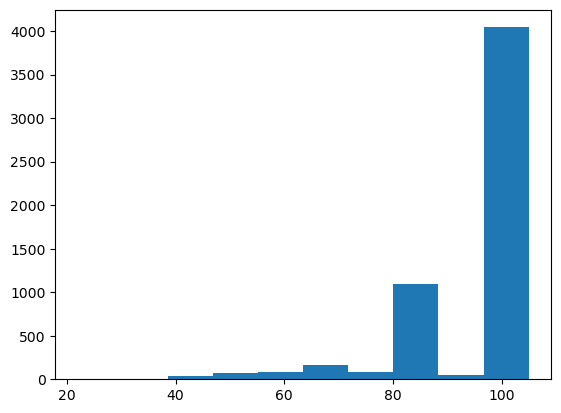

In [52]:
nan_count_per_row = dataset.isna().sum(axis=1)
plt.hist(nan_count_per_row, bins=10)

In [53]:
# for row in dataset.iterrows():
#     # remove rows the have more than 80 nan values
#     if row[1].isna().sum() > 80:
#         dataset.drop(row[0], inplace=True)
# dataset.shape

In [54]:
# nan_count_per_row = dataset.isna().sum(axis=1)
# plt.hist(nan_count_per_row, bins=10)

<AxesSubplot: >

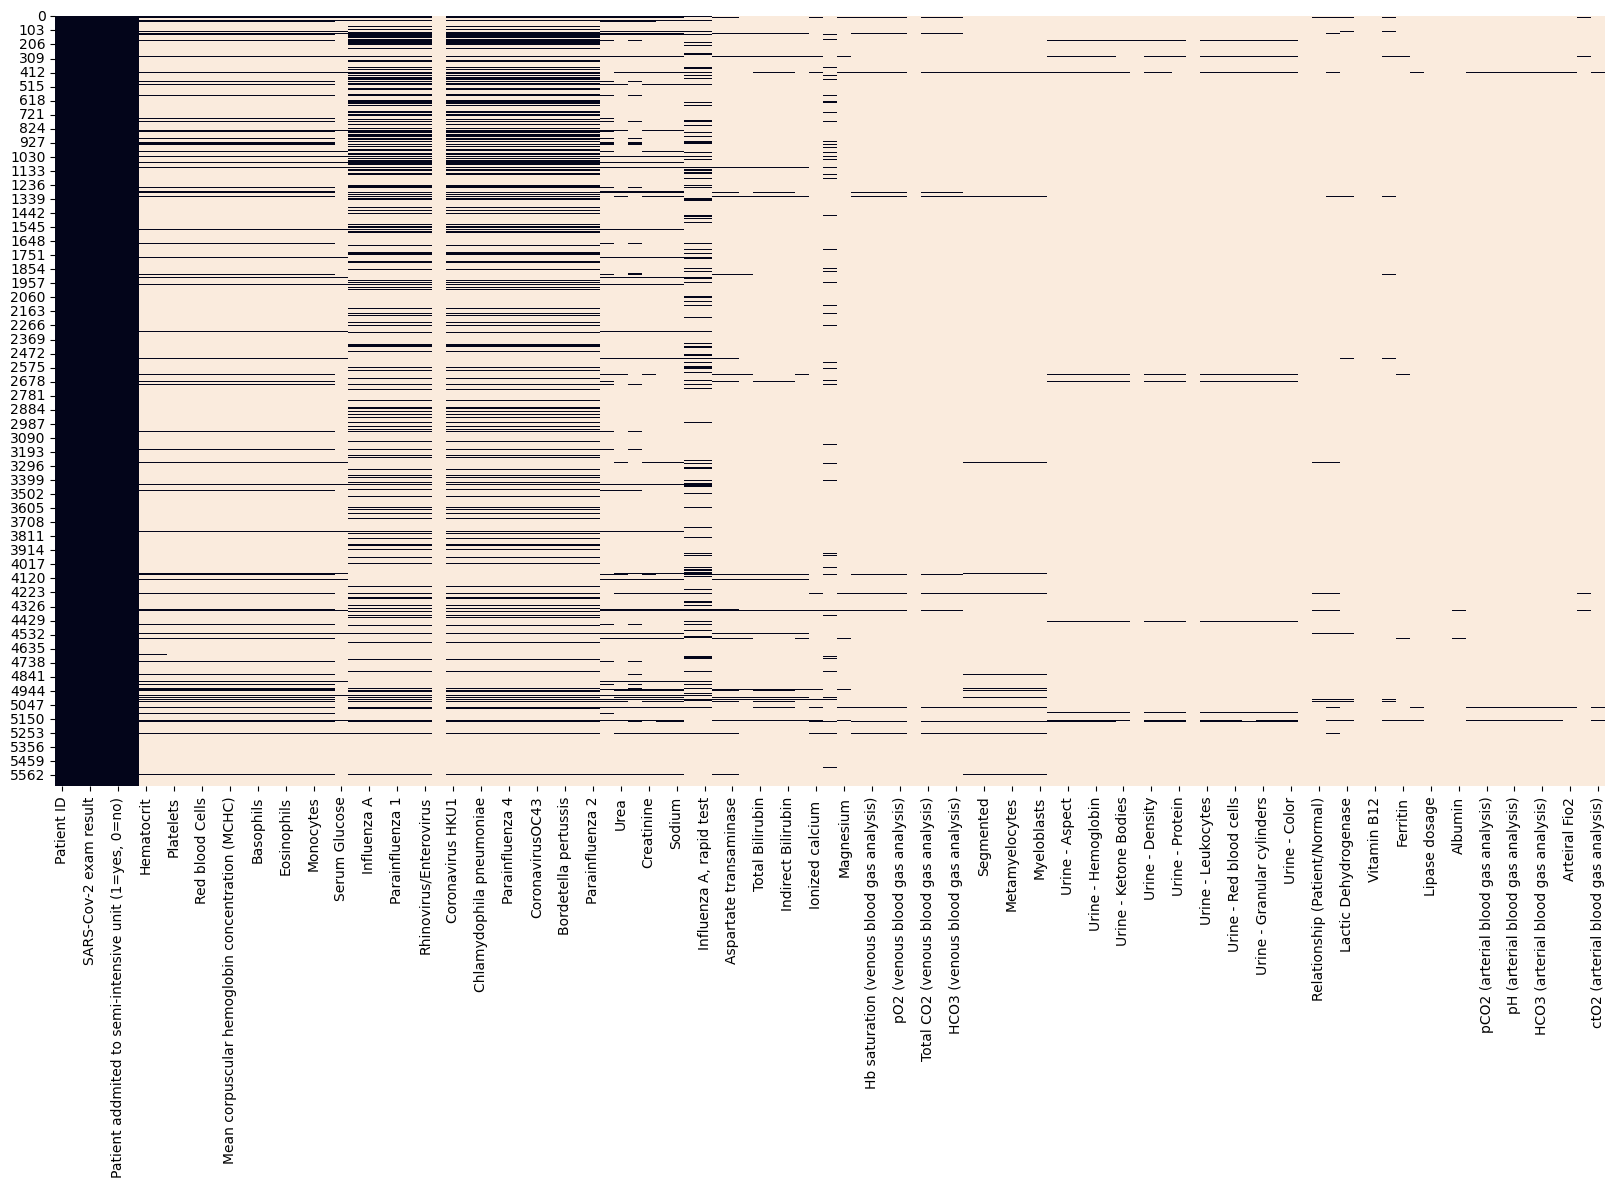

In [55]:
plt.figure(figsize=(20, 10))
sns.heatmap(dataset.isna(), cbar=False)

In [56]:
(dataset.isna().sum()/dataset.shape[0]).sort_values()

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

## Supression des données inutiles

In [57]:
dataset = dataset[dataset.columns[dataset.isna().sum()/dataset.shape[0] < 0.9]]
dataset.shape

(5644, 39)

<AxesSubplot: >

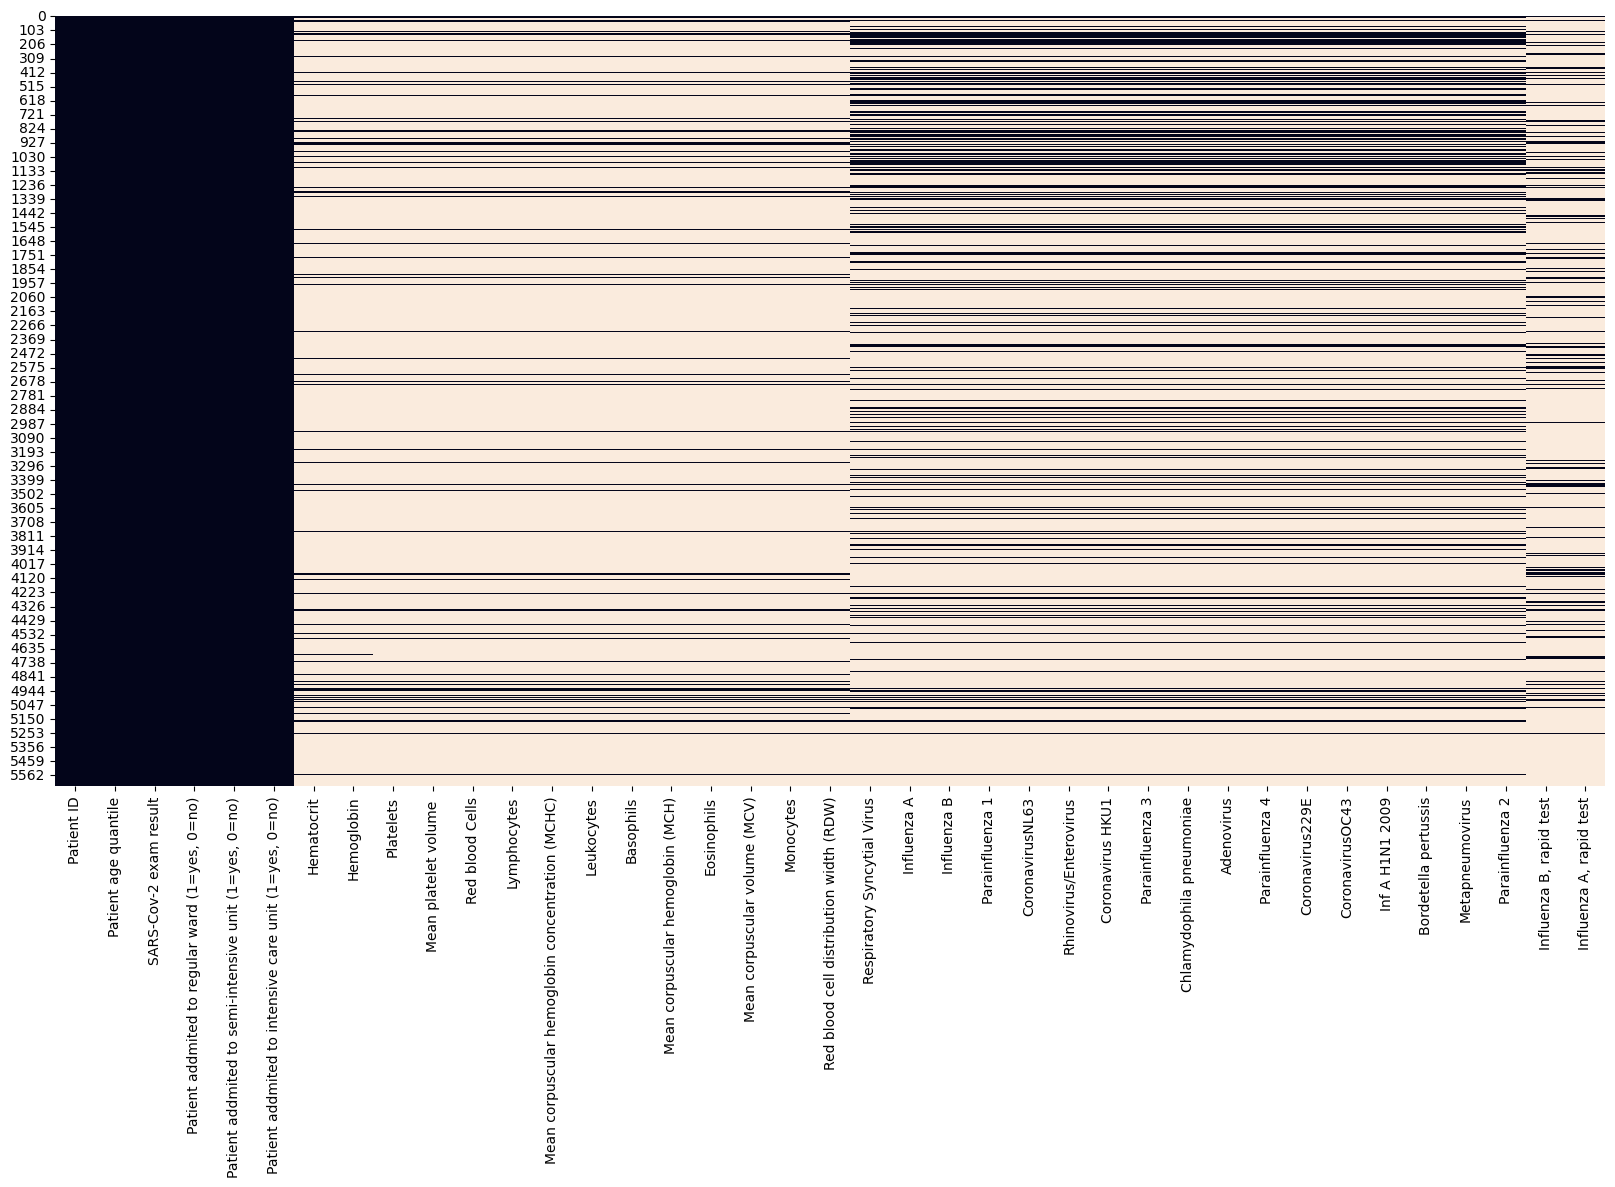

In [58]:
plt.figure(figsize=(20, 10))
sns.heatmap(dataset.isna(), cbar=False)

In [62]:
dataset = dataset.drop('Patient ID', axis=1)

## Examination de la target

In [63]:
dataset['SARS-Cov-2 exam result'].value_counts(normalize=True)

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

## Histograme des valeur continues

/tmp/ipykernel_4272/1303243353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col])
/tmp/ipykernel_4272/1303243353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col])
/tmp/ipykernel_4272/1303243353.py:3: UserWarning: 

`distplot` is a deprecated function and will be re

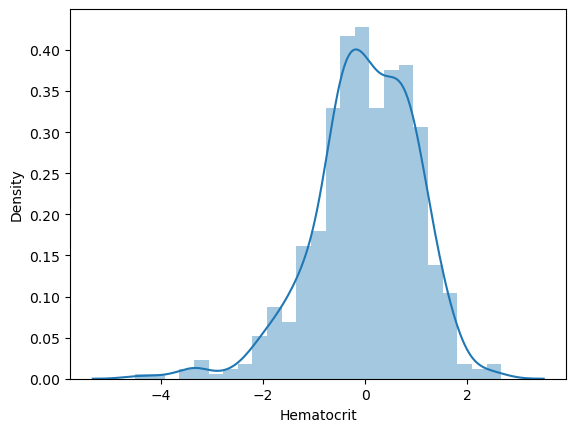

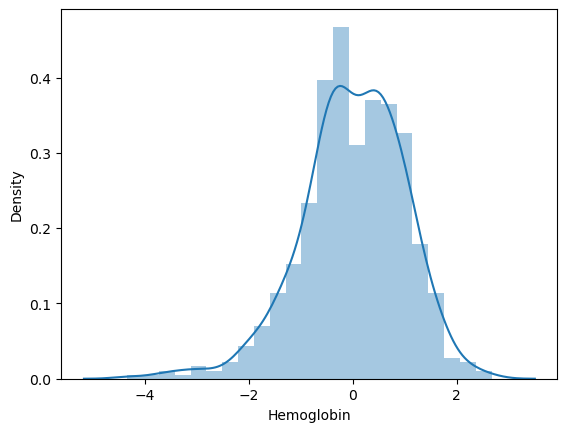

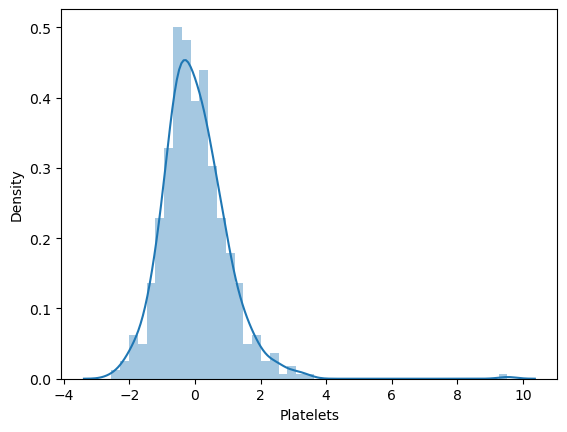

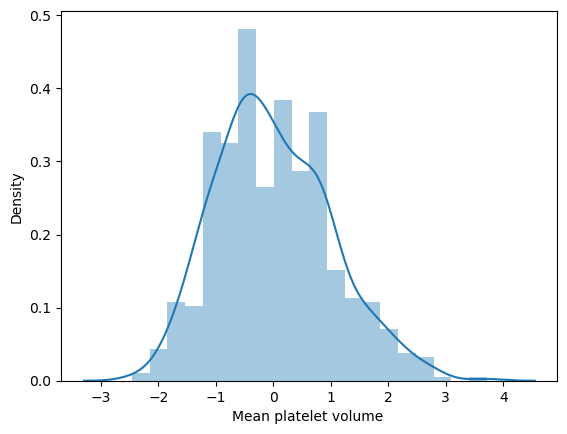

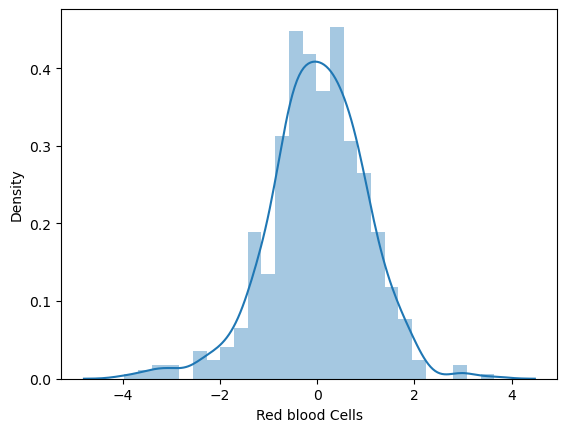

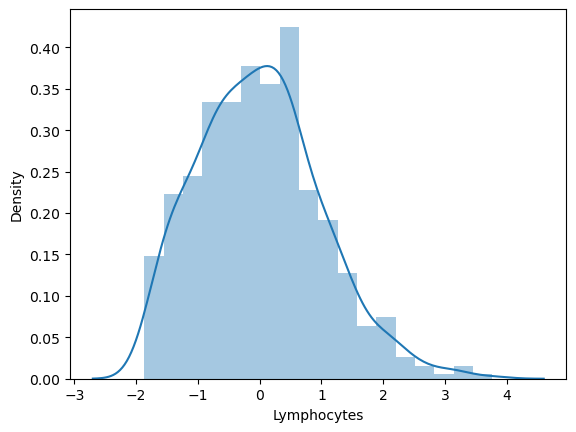

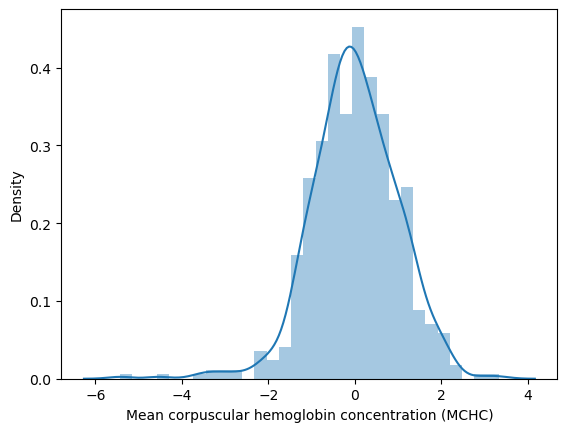

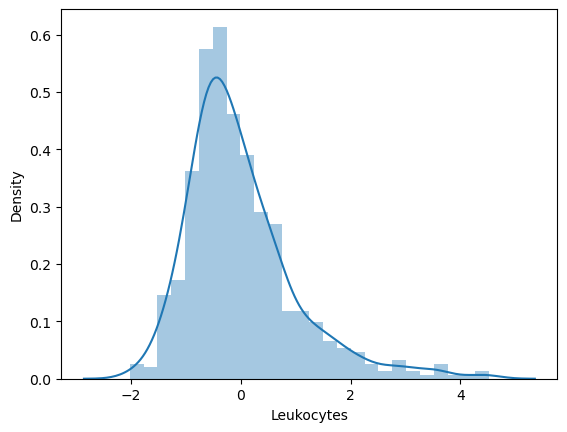

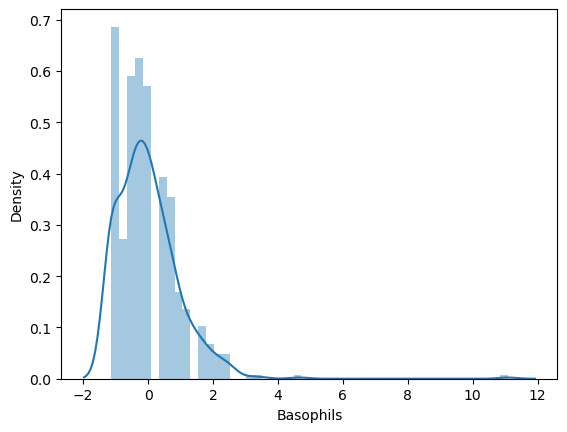

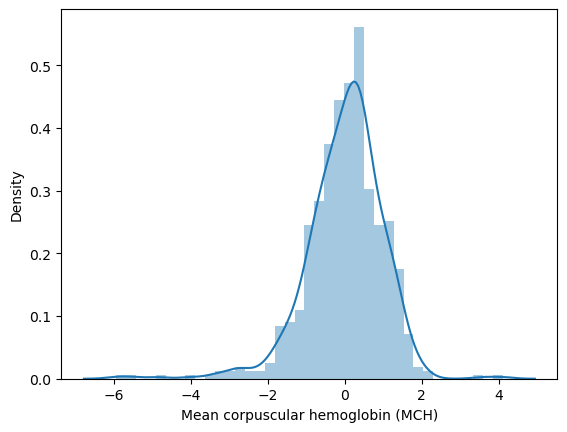

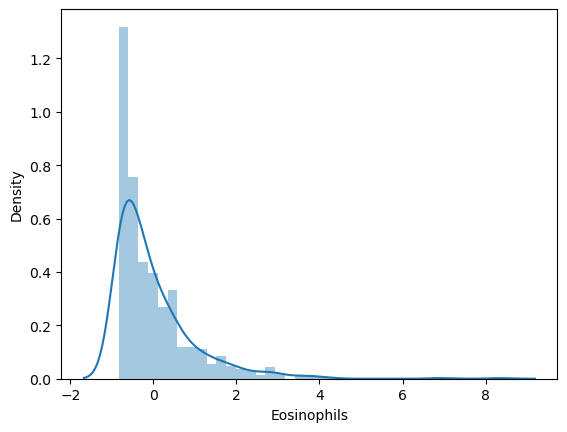

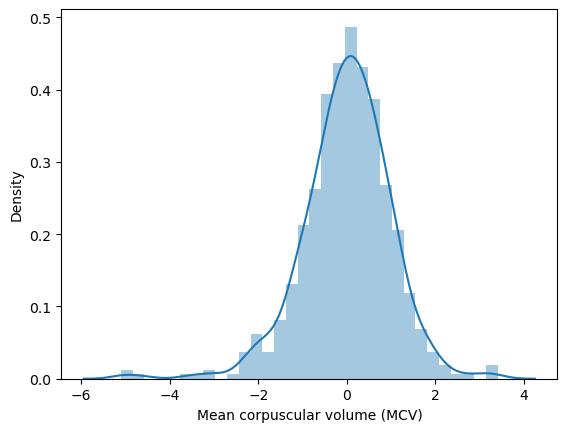

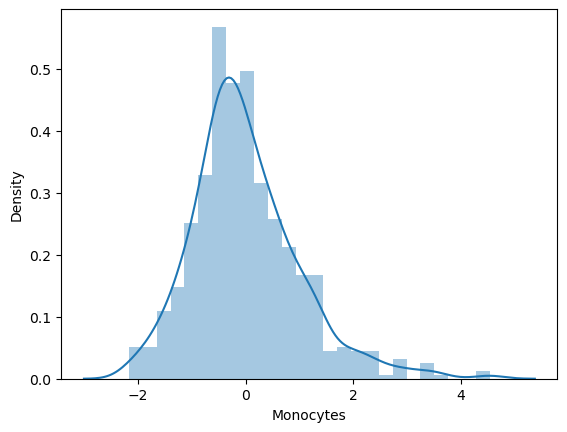

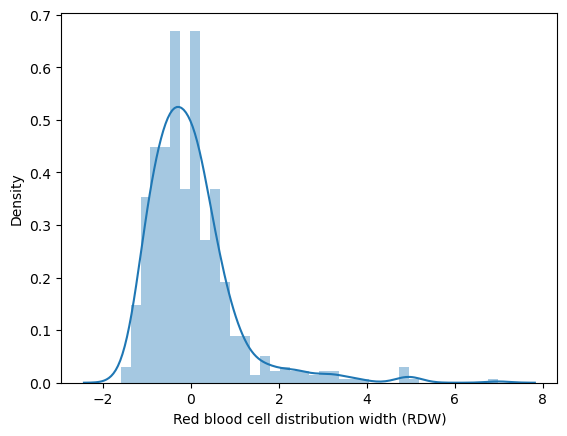

In [65]:
for col in dataset.select_dtypes('float'):
    plt.figure()
    sns.distplot(dataset[col])

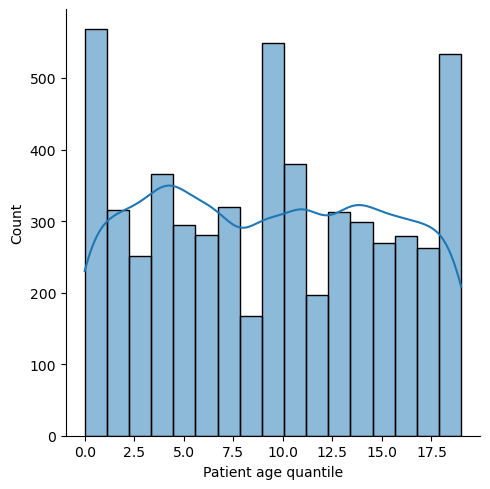

In [67]:
sns.displot(dataset['Patient age quantile'], kde=True)

## Examination des variables discretes

In [69]:
for col in dataset.select_dtypes('object'):
    print(f'{col :-<50}, {dataset[col].unique()}')

SARS-Cov-2 exam result----------------------------, ['negative' 'positive']
Respiratory Syncytial Virus-----------------------, [nan 'not_detected' 'detected']
Influenza A---------------------------------------, [nan 'not_detected' 'detected']
Influenza B---------------------------------------, [nan 'not_detected' 'detected']
Parainfluenza 1-----------------------------------, [nan 'not_detected' 'detected']
CoronavirusNL63-----------------------------------, [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus----------------------------, [nan 'detected' 'not_detected']
Coronavirus HKU1----------------------------------, [nan 'not_detected' 'detected']
Parainfluenza 3-----------------------------------, [nan 'not_detected' 'detected']
Chlamydophila pneumoniae--------------------------, [nan 'not_detected' 'detected']
Adenovirus----------------------------------------, [nan 'not_detected' 'detected']
Parainfluenza 4-----------------------------------, [nan 'not_detected' 'detected']


## Relation entre les variables et la target

In [75]:
positive = dataset[dataset['SARS-Cov-2 exam result'] == 'positive']
negative = dataset[dataset['SARS-Cov-2 exam result'] == 'negative']

In [76]:
missing_rate = dataset.isna().sum()/dataset.shape[0]

In [78]:
blood_columns = dataset.columns[(missing_rate < 0.9) & (missing_rate > 0.8)]
blood_columns

Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)', 'Influenza B, rapid test',
       'Influenza A, rapid test'],
      dtype='object')

In [79]:
viral_columns = dataset.columns[(missing_rate < 0.8) & (missing_rate > 0.7)]
viral_columns

Index(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2'],
      dtype='object')

### Target / Blood

/tmp/ipykernel_4272/2080495047.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive[col], label='positive')
/tmp/ipykernel_4272/2080495047.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative[col], label='negative')
/tmp/ipykernel_4272/2080495047.py:3: UserWarning: 

`distplot` i

ValueError: could not convert string to float: 'negative'

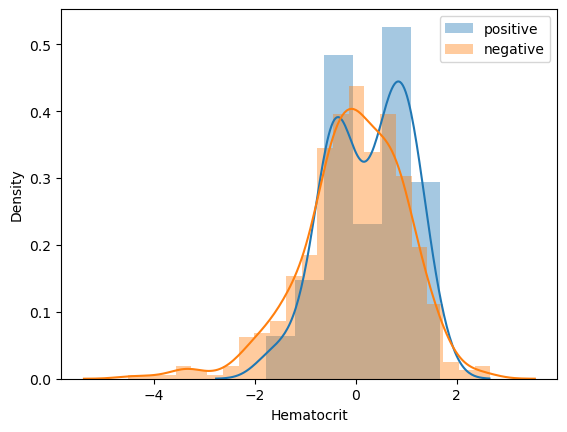

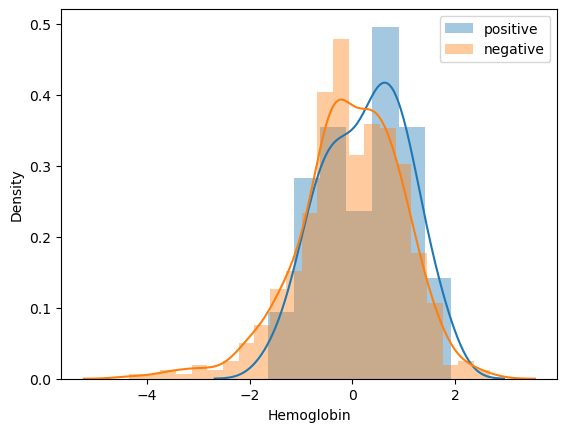

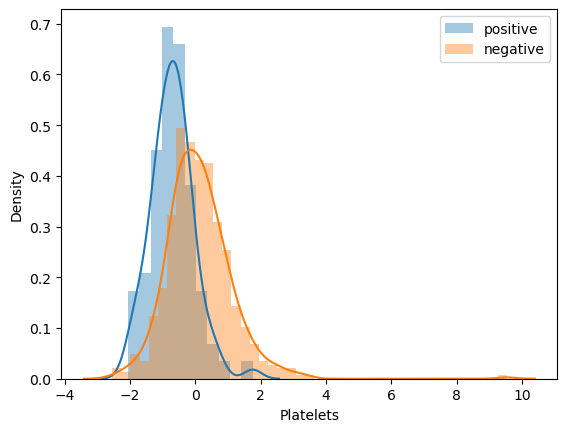

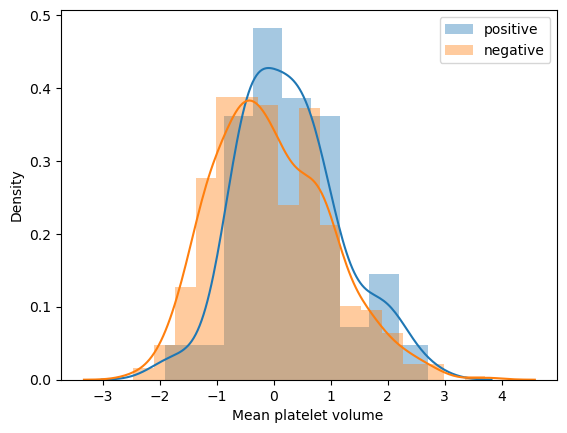

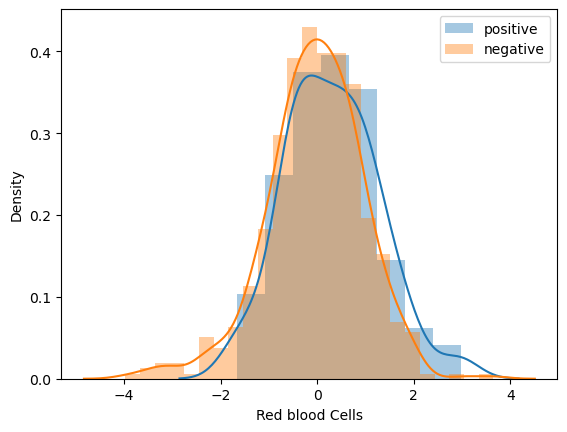

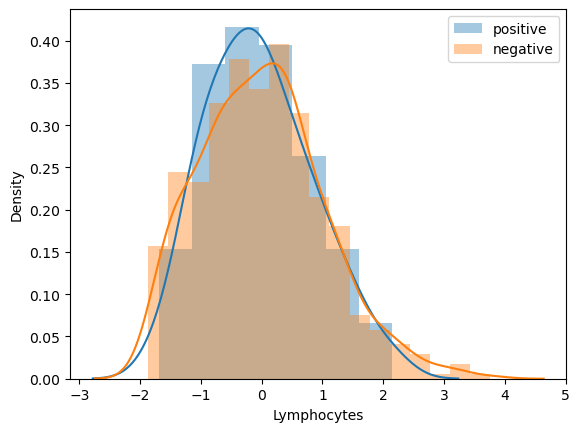

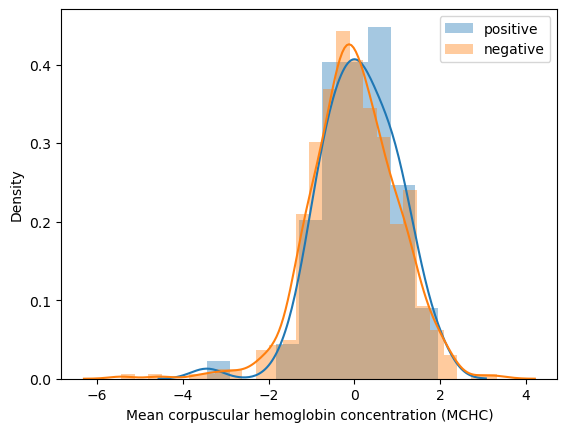

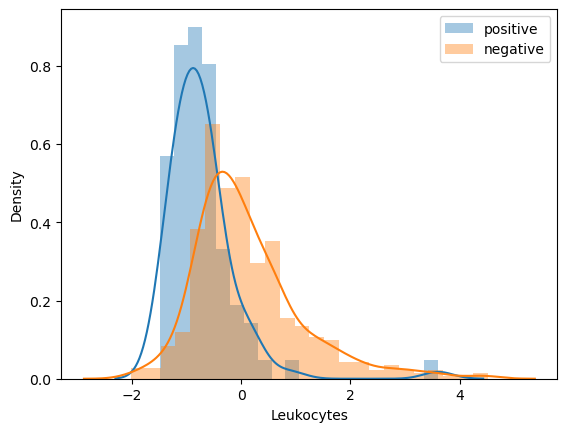

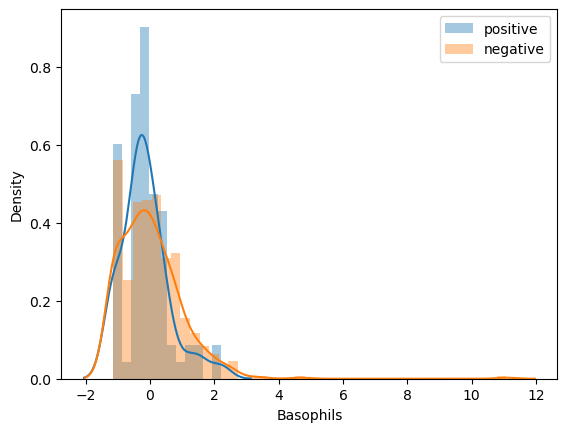

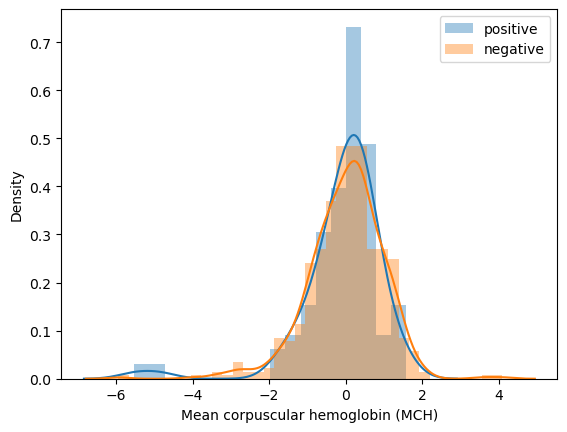

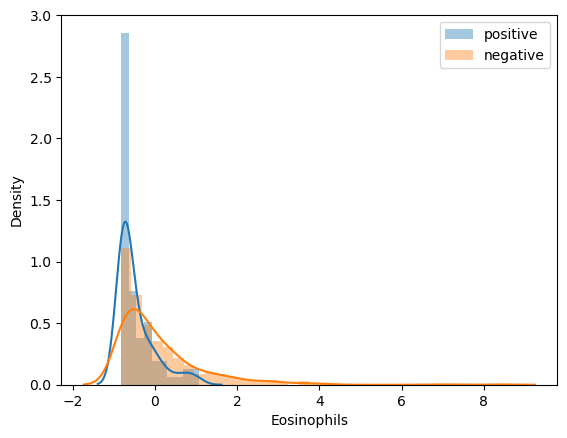

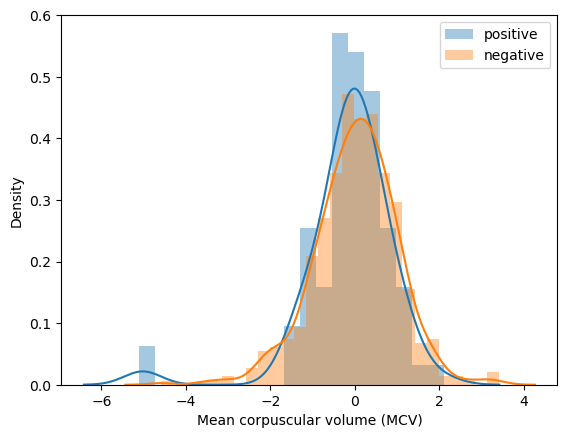

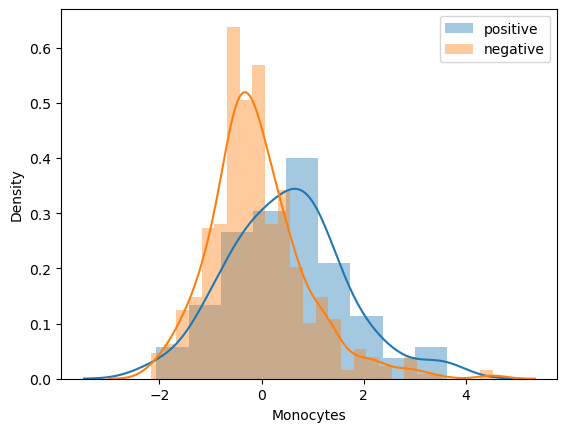

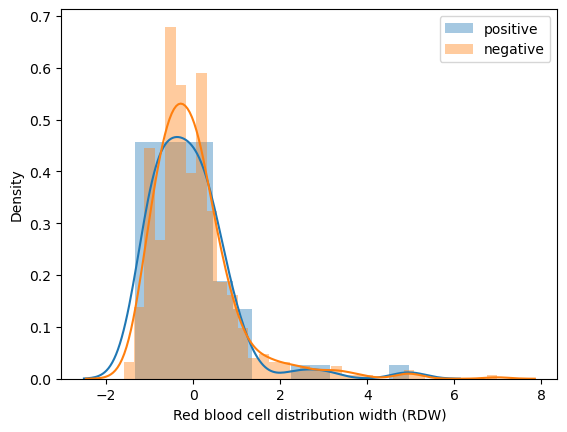

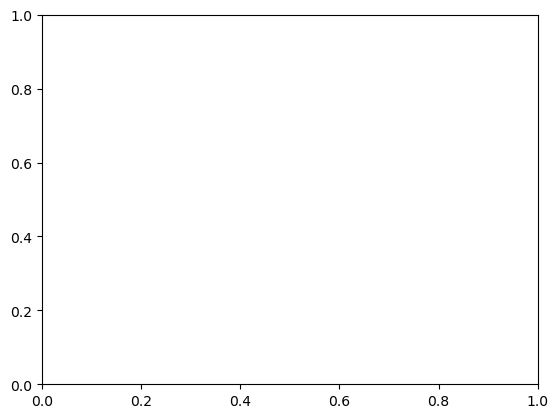

In [82]:
for col in blood_columns:
    plt.figure()
    sns.distplot(positive[col], label='positive')
    sns.distplot(negative[col], label='negative')
    plt.legend()

### Target / Age

<AxesSubplot: xlabel='Patient age quantile', ylabel='count'>

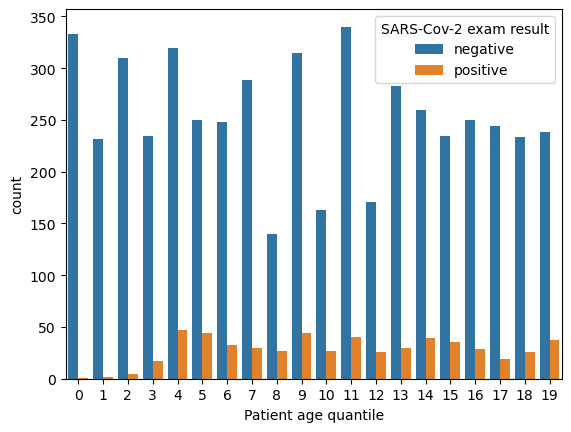

In [83]:
sns.countplot(x = 'Patient age quantile', hue='SARS-Cov-2 exam result', data=dataset)

### Target / Viral

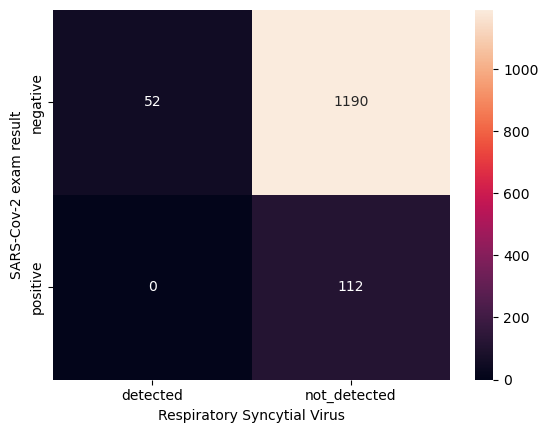

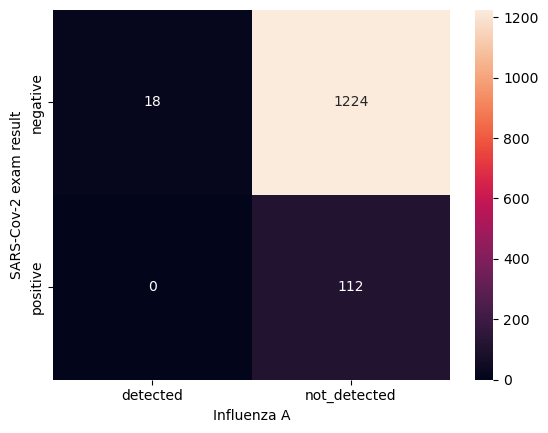

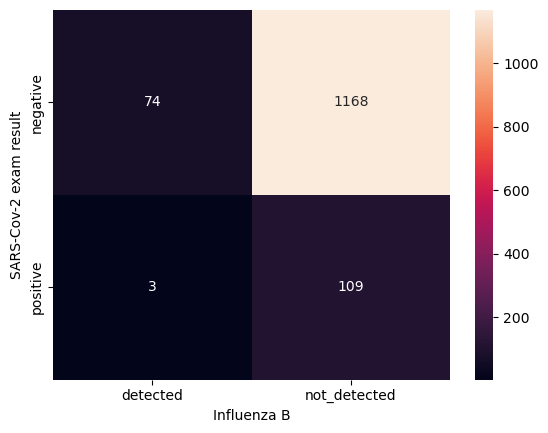

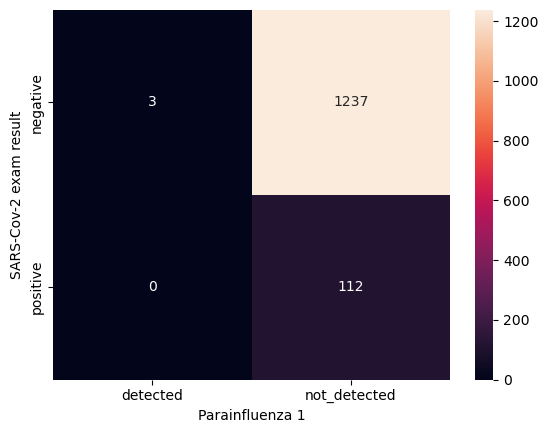

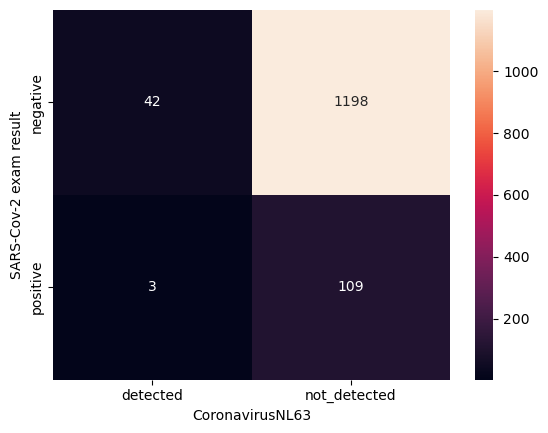

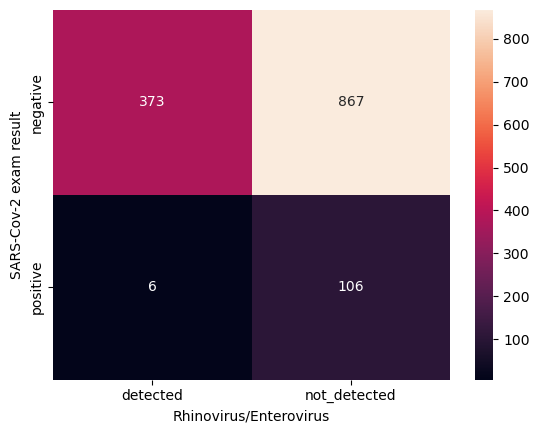

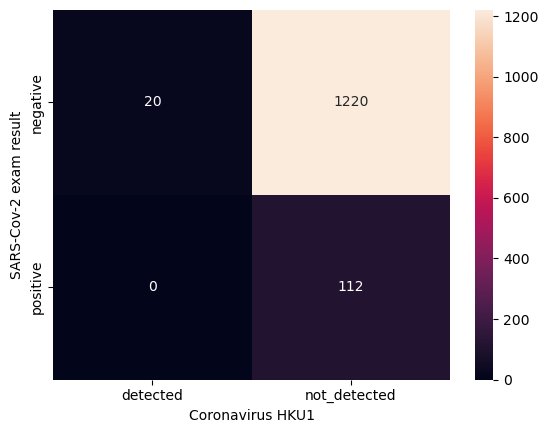

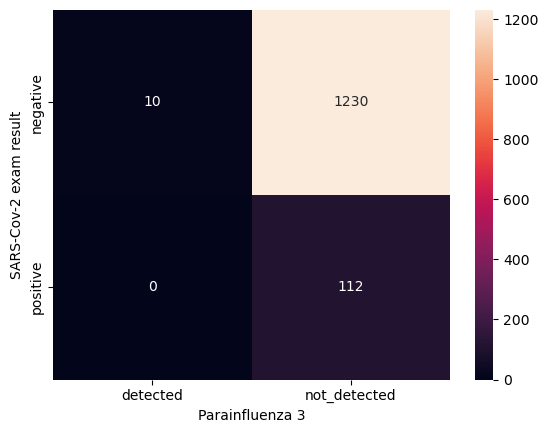

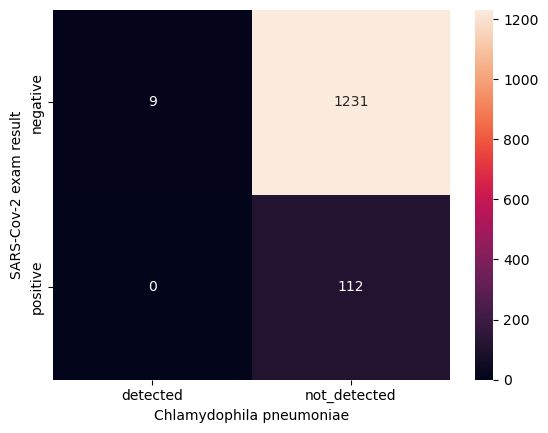

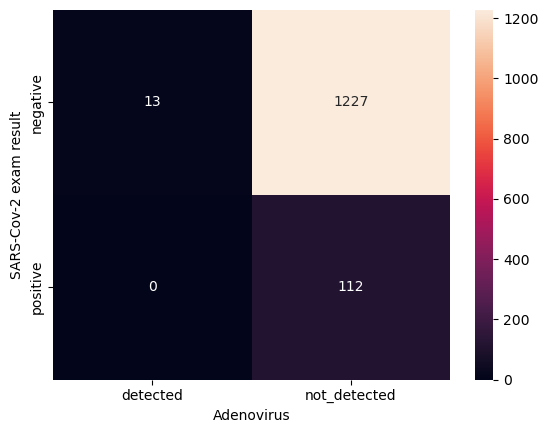

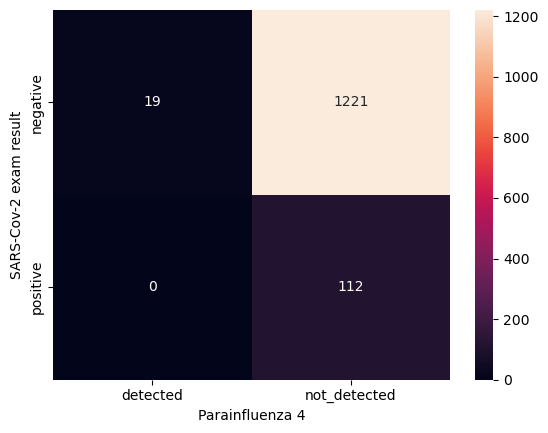

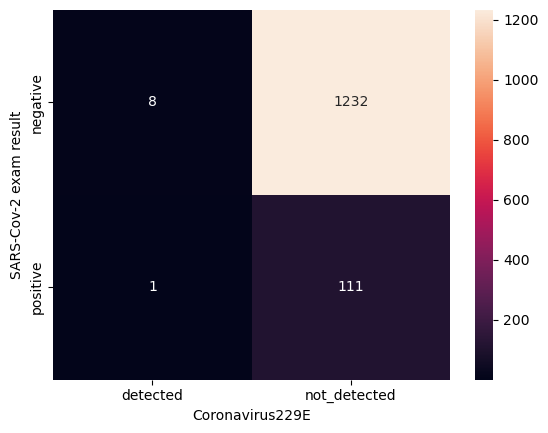

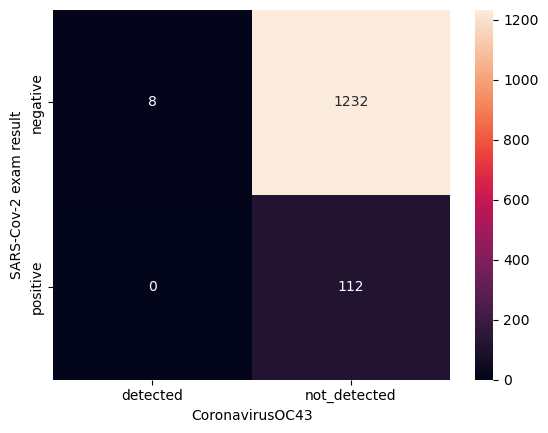

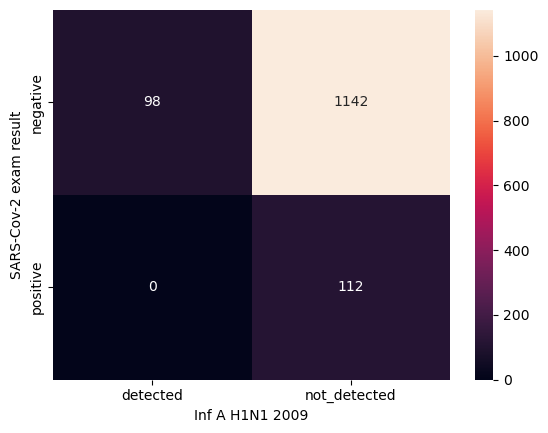

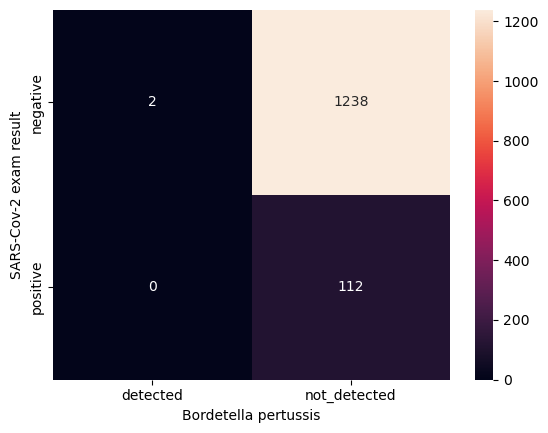

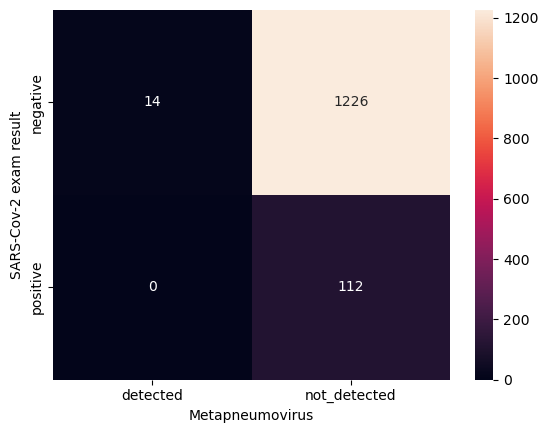

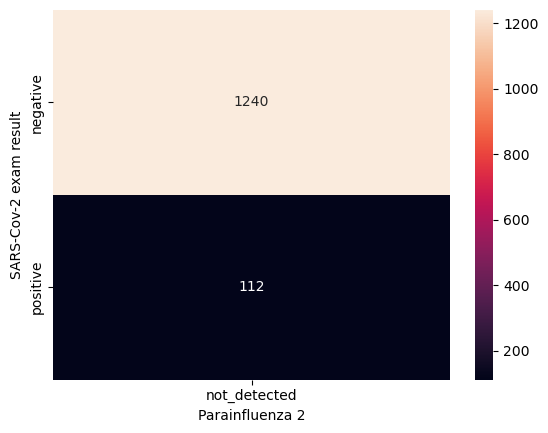

In [88]:
for col in viral_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(dataset['SARS-Cov-2 exam result'], dataset[col]), annot=True, fmt='d')